In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv ('ParisHousingClass99.88.csv')
dataset

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005           0                  1   
1                 8              6  2015           1                  0   
2                 6              8  2021           0                  0   
3                10              4  2012           0                  1   
4                 3              7  1990           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  \
0         4313   9005     956               0             7  7559081.5   
1         3653   2436     128               1             2  8085989.5   
2         2937   8852     135               1             9  5574642.1   
3          659   7141     359               0             3  3232561.2   
4         8435   2429     292               1             4  7055052.0   
...        ...    ...     ...             ...           ...        ...   
9995      9311   1698     218               0             4   176425.9   
9996      9061   1742     230               0             0  4448474.0   
9997      8304   7730     345               1             9  8390030.5   
9998      2590   6174     339               1             4  5905107.0   
9999      8485   2024     278               1             6   146708.4   

     category  
0       Basic  
1      Luxury  
2       Basic  
3      Luxury  
4      Luxury  
...       ...  
9995    Basic  
9996    Basic  
9997    Basic  
9998    Basic  
9999    Basic  

[10000 rows x 18 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
dataset.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [5]:
dataset.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

In [6]:
dataset.nunique()

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
category                 2
dtype: int64

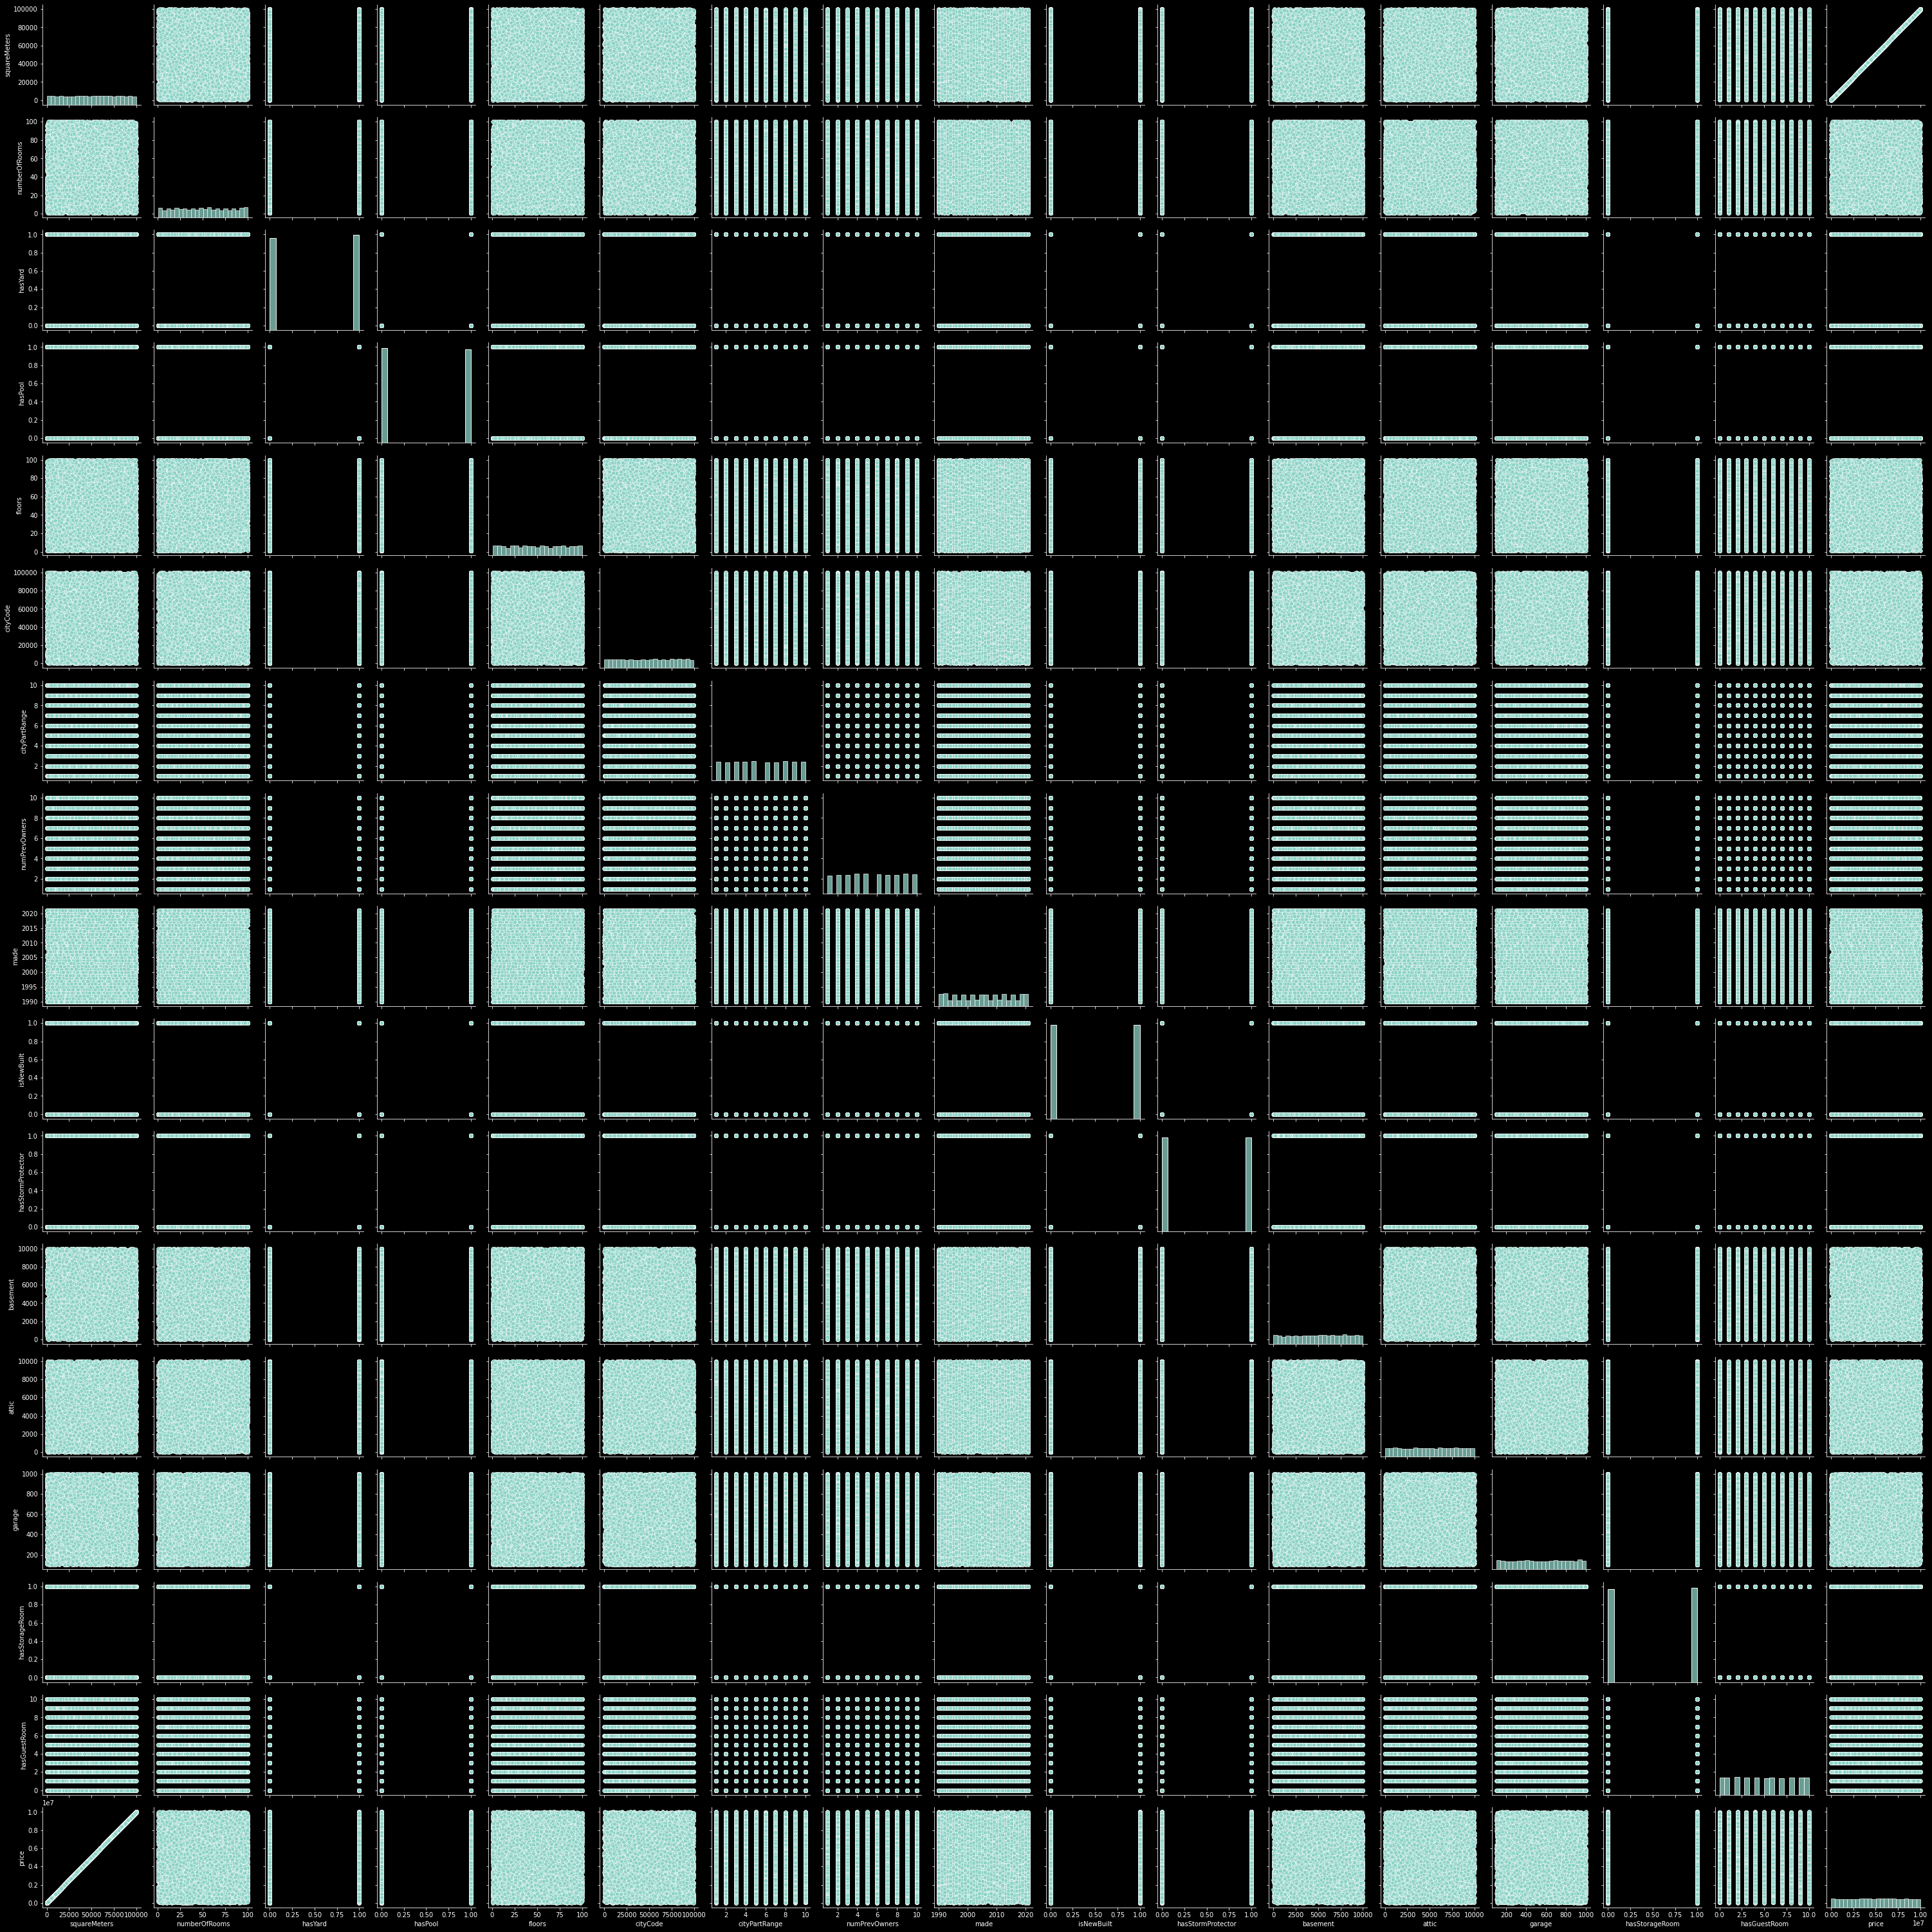

In [7]:
sns.pairplot(dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='made', ylabel='category'>

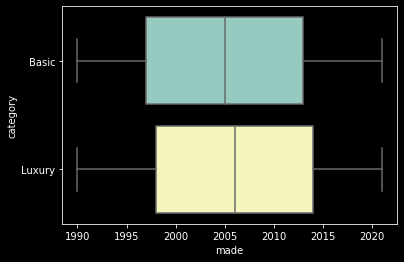

In [8]:
sns.boxplot('made','category',data=dataset)

In [9]:
LE = LabelEncoder ()
dataset['category'] = LE.fit_transform(dataset['category'])

In [10]:
dataset

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005           0                  1   
1                 8              6  2015           1                  0   
2                 6              8  2021           0                  0   
3                10              4  2012           0                  1   
4                 3              7  1990           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  \
0         4313   9005     956               0             7  7559081.5   
1         3653   2436     128               1             2  8085989.5   
2         2937   8852     135               1             9  5574642.1   
3          659   7141     359               0             3  3232561.2   
4         8435   2429     292               1             4  7055052.0   
...        ...    ...     ...             ...           ...        ...   
9995      9311   1698     218               0             4   176425.9   
9996      9061   1742     230               0             0  4448474.0   
9997      8304   7730     345               1             9  8390030.5   
9998      2590   6174     339               1             4  5905107.0   
9999      8485   2024     278               1             6   146708.4   

      category  
0            0  
1            1  
2            0  
3            1  
4            1  
...        ...  
9995         0  
9996         0  
9997         0  
9998         0  
9999         0  

[10000 rows x 18 columns]

<AxesSubplot:>

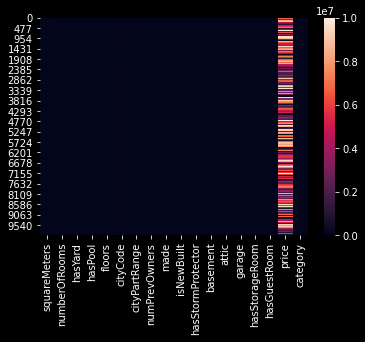

In [11]:
sns.heatmap(dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='garage', ylabel='price'>

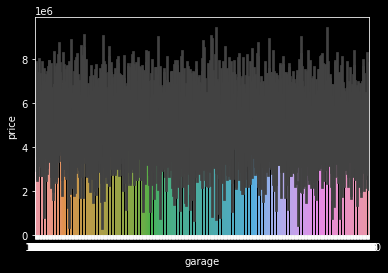

In [12]:
sns.barplot('garage','price',data=dataset)

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


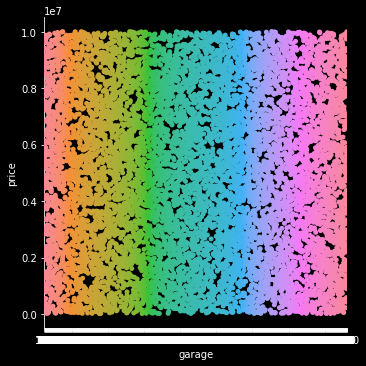

In [13]:
sns.catplot('garage','price',data=dataset)

In [14]:
x = dataset.iloc[:,:-1].values
x

array([[7.5523000e+04, 3.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.0000000e+00, 7.5590815e+06],
       [8.0771000e+04, 3.9000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        2.0000000e+00, 8.0859895e+06],
       [5.5712000e+04, 5.8000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 5.5746421e+06],
       ...,
       [8.3841000e+04, 3.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 8.3900305e+06],
       [5.9036000e+04, 7.0000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        4.0000000e+00, 5.9051070e+06],
       [1.4400000e+03, 8.4000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        6.0000000e+00, 1.4670840e+05]])

In [15]:
y = dataset.iloc[:,-1].values
y

array([0, 1, 0, ..., 0, 0, 0])

In [16]:
SC = StandardScaler ()
x[:,:2] = SC.fit_transform(x[:,:2])
x[:,4:9] = SC.fit_transform(x[:,4:9])
x[:,11:14] = SC.fit_transform(x[:,11:14])
x[:,15:17] = SC.fit_transform(x[:,15:17])

In [17]:
df_x = pd.DataFrame(x)

In [18]:
df_x

0         1    2    3         4         5         6         7   \
0     0.891562 -1.643518  0.0  1.0  0.440453 -1.408453 -0.874027  0.867593   
1     1.073956 -0.394180  1.0  1.0  1.652041 -0.373880  0.866993  0.167441   
2     0.203033  0.265193  0.0  1.0 -1.082685 -0.543643  0.170585  0.867593   
3    -0.610092 -0.116549  0.0  0.0 -1.532703 -0.768361  1.563401 -0.532710   
4     0.714521 -1.088257  1.0  1.0  1.375106 -0.419941 -0.874027  0.517517   
...        ...       ...  ...  ...       ...       ...       ...       ...   
9995 -1.673244  1.341012  0.0  1.0 -1.567320  0.789772  0.518789  0.167441   
9996 -0.190009 -0.741218  1.0  1.0 -1.325002 -0.538506  1.215197 -0.532710   
9997  1.180654 -1.643518  0.0  0.0  0.648154  1.058689  1.563401  1.567745   
9998  0.318559  0.681639  0.0  0.0  1.582807  0.194121 -1.570434 -0.882786   
9999 -1.683183  1.167493  0.0  0.0 -0.044181 -1.096819  0.170585  1.567745   

            8    9    10        11        12        13   14        15  \
0    -0.052484  0.0  1.0 -0.250333  1.374130  1.537488  0.0  0.631373   
1     1.021904  1.0  0.0 -0.479772 -0.895592 -1.622370  1.0 -0.942810   
2     1.666537  0.0  0.0 -0.728678  1.321265 -1.595657  1.0  1.261046   
3     0.699588  0.0  1.0 -1.520589  0.730080 -0.740816  0.0 -0.627973   
4    -1.664066  1.0  0.0  1.182616 -0.898010 -0.996505  1.0 -0.313136   
...        ...  ...  ...       ...       ...       ...  ...       ...   
9995  0.377271  0.0  1.0  1.487144 -1.150586 -1.278908  0.0 -0.313136   
9996 -1.664066  0.0  1.0  1.400235 -1.135383 -1.233113  0.0 -1.572483   
9997 -0.052484  1.0  1.0  1.137076  0.933592 -0.794243  1.0  1.261046   
9998  0.484710  0.0  1.0 -0.849307  0.395962 -0.817141  1.0 -0.313136   
9999 -1.234311  1.0  0.0  1.199998 -1.037946 -1.049932  1.0  0.316537   

            16  
0     0.891687  
1     1.074814  
2     0.201994  
3    -0.611997  
4     0.716512  
...        ...  
9995 -1.674158  
9996 -0.189406  
9997  1.180484  
9998  0.316848  
9999 -1.684486  

[10000 rows x 17 columns]

<AxesSubplot:>

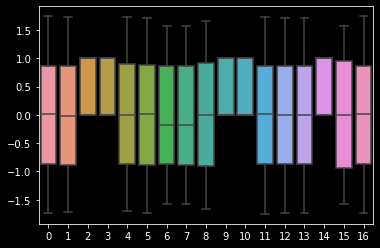

In [19]:
sns.boxplot(data=x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.2 ,random_state = 0)

In [21]:
x_train

array([[-0.99541912, -0.22066089,  1.        , ...,  1.        ,
         1.26104641, -0.99425613],
       [-0.99072721,  0.78575045,  1.        , ...,  0.        ,
        -0.62797303, -0.9898396 ],
       [ 1.49469863, -0.98414536,  1.        , ...,  1.        ,
         0.94620984,  1.49459852],
       ...,
       [ 1.36593179,  0.50811974,  0.        , ...,  0.        ,
        -0.31313646,  1.36455255],
       [ 1.56886554,  1.2716042 ,  0.        , ...,  1.        ,
         0.00170012,  1.56785701],
       [-1.11963307,  0.16108134,  0.        , ...,  0.        ,
         0.63137326, -1.12058822]])

In [22]:
x_test

array([[-1.24721824, -1.53940679,  0.        , ...,  0.        ,
        -1.25764617, -1.24792687],
       [-1.55886526, -0.08184553,  0.        , ...,  0.        ,
         0.00170012, -1.55945402],
       [ 0.445414  , -0.39418009,  0.        , ...,  1.        ,
         0.94620984,  0.44459064],
       ...,
       [ 0.41597662,  0.54282357,  1.        , ...,  1.        ,
        -0.9428096 ,  0.41576603],
       [ 1.34660808,  1.4451234 ,  0.        , ...,  1.        ,
        -1.57248275,  1.34669516],
       [ 1.5689003 , -0.01243786,  1.        , ...,  0.        ,
         0.31653669,  1.56815847]])

In [23]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [24]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
svc = SVC ()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1463
           1       1.00      0.99      1.00       537

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [27]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

Actual  Predict
0          0        0
1          0        0
2          0        0
3          0        0
4          1        1
...      ...      ...
1995       0        0
1996       0        0
1997       0        0
1998       0        0
1999       1        1

[2000 rows x 2 columns]

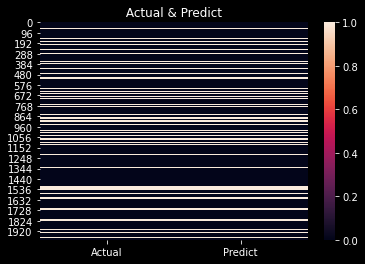

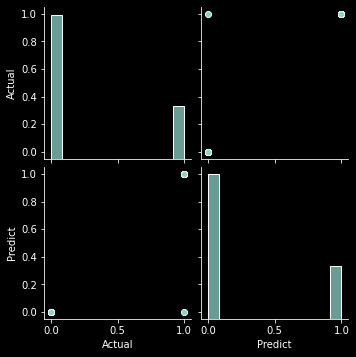

In [28]:
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap(df_comp)
sns.pairplot(df_comp)

In [29]:
RFC=RandomForestClassifier(n_estimators=1500,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp_2

Actual  Predict
0          0        0
1          0        0
2          0        0
3          0        0
4          1        1
...      ...      ...
1995       0        0
1996       0        0
1997       0        0
1998       0        0
1999       1        1

[2000 rows x 2 columns]

In [31]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1463
           1       1.00      0.99      1.00       537

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

